

# Palmer Penguins Group Project

By Brendan Pelikh & Sophie Kogan

## Group Contributions Statement

Both Sophie and Brendan wrote the data acquistion code and the preliminary cleaning of the penguins data frame for Exploratory Analysis. In the Data Import and Cleaning Section, Brendan actually imported the penguins data set and split the data into training and testing datasets, while Sophie led the creation of the `clean_up` function. In the Exploratory Analysis section, Sophie led Figure 2 and Table 2. Brendan led Figures 1 and 3, as well as Table 1. Sophie and Brendan wrote the pertinent analyses and explanations for the respective data visualizations they created. Because Sophie led the `clean_up` function in the Data Import and cleaning section, Brendan primarily led the Feature Selection section, writing both the `feature_combinations` and `model_column_matcher` functions. For modeling, Sophie wrote the code segment pertaining to Cross-Validation and the resultant selection of hyperparameters for our chosen models, as well as the K-Nearest Neighbors model. Brendan led the Multinomial Logistic Regression model as well as the Support Vector Machine. Again, Sophie and Brendan wrote the pertinent explanations and analyses for the figures produced to analyze the models they created. In addition, pertinent background knowledge for the hyperparameters and models was written for each model by the group member who led its creation. Both Brendan and Sophie collaboratively worked on the Conclusion section. Throughout the process of the project, Brendan and Sophie kept in consistent communication with regard to the project and checked each other's work and analyses.

# Data Import and Cleaning

We begin by importing necessary packages and modules for obtaining and parsing through data. Then we actually read in the ```palmer_penguins.csv``` file in as a data frame.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Here, we read in the palmer_penguins.csv file that contains data on our penguins as a data frame, which we can interact with to extract and manipulate data
penguins = pd.read_csv("palmer_penguins.csv")

#Showing the first 5 elements of the loaded in data frame
penguins.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## Cleaning Data for Modeling

Before cleaning our data, we want to split it to ensure that the cleaning process doesn't pollute the test set. Polluting the test set means accidentally using information from the test set during the training process, polluting it as the whole purpose of test sets is that it isn't seen by our models during training. Below, a seed is set so that results are reproducible, as future processes such as `train_test_split` as well as `cross_val_score`, used in the future, randomly choose different elements of data.

In [2]:
from sklearn.model_selection import train_test_split

 # Setting arbitrary seed so that results are reproducible. 
np.random.seed(1111)

# This splits our penguins data frame into two distinct data frames:
# One will be used for training our models (train) and is ~80% the size of the actual penguins data frame
# One will be used for testing our models (test) and is ~20% the size of the actual penguins data frame
train, test = train_test_split(penguins, test_size = 0.2) 

Let's confirm that we have disinct train and test subsets of the overall data at an 80/20 proportion before proceeding. Checking the heads of these two new data frames ensures that we don't have the same data points.

In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
193,PAL0809,42,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A2,Yes,11/24/08,46.2,17.5,187.0,3650.0,FEMALE,9.61734,-24.66188,NaN
212,PAL0910,61,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N96A1,Yes,11/27/09,51.9,19.5,206.0,3950.0,MALE,NaN,-23.78767,NaN
66,PAL0809,67,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N30A1,Yes,11/6/08,35.5,16.2,195.0,3350.0,FEMALE,8.56192,-25.95541,NaN
188,PAL0809,37,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N69A1,Yes,11/14/08,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859,NaN
138,PAL0910,139,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N79A1,No,11/16/09,37.0,16.5,185.0,3400.0,FEMALE,8.61651,-26.07021,Nest never observed with full clutch.


In [4]:
test.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
115,PAL0910,116,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/17/09,42.7,18.3,196.0,4075.0,MALE,8.91434,-26.42018,NaN
27,PAL0708,28,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N17A2,Yes,11/12/07,40.5,17.9,187.0,3200.0,FEMALE,8.08138,-25.49448,NaN
310,PAL0910,91,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N15A1,Yes,11/25/09,47.5,15.0,218.0,4950.0,FEMALE,8.29671,-26.08547,NaN
284,PAL0809,65,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N20A1,Yes,11/4/08,45.8,14.2,219.0,4700.0,FEMALE,8.60447,-26.61601,NaN
209,PAL0910,58,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N94A2,Yes,11/21/09,49.3,19.9,203.0,4050.0,MALE,9.88809,-24.59513,NaN


Because we did an 80/20 split of the data in the penguins data frame, our train dataframe should be ~4 times bigger in size than our test dataframe.

In [5]:
train.size/test.size #Should be roughly 4 times greater due to 80/20 split

3.9855072463768115

Now that we have our penguins data frame loaded into the notebook, it is time to clear penguin samples with unusable data, such as those with NaN values for measurements. Broadly speaking, NaN values for the purposes of the dataframe can be thought of as missing data. To do this and avoid redundancy, we will implement a ``` clean_up ``` function that will be applied to both the test and train data frames.

In [6]:
from sklearn import preprocessing 

def clean_up (data_df):
    """

    Input/Function Parameters:

        data_df: The input pandas dataframe containing the penguin data.

    Function:
        The purpose of this function is to and preprocess the given dataframe for modeling penguin species by removing invalud data as well as data unuseful for species modeling.

        This is accomplished via the following steps:
        1. Creating a copy of the input dataframe to avoid modifying the original data.
        2. Cleans up the species names to include only the first word for ease of readability
        3. Droping columns that are not useful for modeling the species, identified below in comments.
        4. Removes rows with undefined data (i.e. NaN values)
        5. Encoding categorical variables into numerical values.
        6. Splits the dataframe into features (X) that will be used to predict a penguin's species (y).


    Returns:

        tuple: A tuple containing two dataframes:
            - X : The features of a dataframe that are candidates for prediction.
            - y : Series containing the corresponding species labels for the penguins.

    """
    #Ensures we don't modify the original test and training data frames.
    df = data_df.copy()

    #Clean up species names to only include the first word and not the full scientific name
    df['Species'] = df['Species'].str.split().str.get(0)

    #Drop columns that will not be useful for modeling species: Comments, Clutch Completion, Date Egg, Individual ID, Stage, Sample Number, and studyName.
    #These columns are more for characterzing a specific sample rather than the sample's species. 
    #As per Exploratory Analysis (future section), we will also exclude the Islands of the Penguins as they cannot be used to differentiate the three different species.
    df = df.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments', 'Island'], axis=1)

    #Drop undefined data from each data frame 
    df = df.dropna()
    df = df.drop(df[df["Sex"] == "."].index)
    
    #Encode Categorical Variables
    le = preprocessing.LabelEncoder()

    #For the following columns of the data frame, all text values will be numerically encoded in alphabetical order.
    #For example, in the 'Sex' column, female penguins will be assigned a 0, while males will be assigned a 1.
    df['Region'] = le.fit_transform(df['Region'])
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Species'] = le.fit_transform(df['Species'])

    #X will be used to predict y, thus we don't want the species of penguins, which we are predicting, to be included in the X dataframe.
    X = df.drop('Species', axis = 1)
    
    y = df['Species']
    return X,y

X_train, y_train = clean_up(train)
X_test, y_test = clean_up(test)

Here, we will check that X has relevant columns for modeling, and y will only have species that are numerically encoded.

In [7]:
X_train.head()

,Region,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
193,0,46.2,17.5,187.0,3650.0,0,9.61734,-24.66188
66,0,35.5,16.2,195.0,3350.0,0,8.56192,-25.95541
188,0,47.6,18.3,195.0,3850.0,0,8.83502,-24.65859
138,0,37.0,16.5,185.0,3400.0,0,8.61651,-26.07021
249,0,50.0,15.3,220.0,5550.0,1,8.30515,-25.19017


In [8]:
y_train.head()

193    1
66     0
188    1
138    0
249    2
Name: Species, dtype: int64

Now, we are ready for feature selection. However, before we select the features of penguins that we will use for our machine learning models, it is important to gain a better overall understanding of the penguins dataset. Thus, we will use exploratory analysis to analyze summary statistics and visualizations of our data to get a better overall understanding of it. This leads us to the Exploratory Analysis section of the project.

# Exploratory Analysis

First, we will copy the data frame so the original one can be used for creating the training and test data frames for modeling.

In [9]:
penguins_explore = penguins.copy()

#Clear unnnecessary columns that will not assist in exploratory analysis. These are the columns used to identify a specific sample rather than a species of a penguin
penguins_explore = penguins_explore.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments'], axis=1)

#Drop subjects with unknown data values
penguins_explore = penguins_explore.dropna()
penguins_explore = penguins_explore.drop(penguins_explore[penguins_explore["Sex"] == "."].index)

#Shortnening Species Names for ease of analysis.
penguins_explore['Species'] = penguins_explore['Species'].str.split().str.get(0)

Let's examine the updated data frame. We see that Species are easier to read and understand, and that only columns with useful penguin characteristics for modelling are present. (How will a comment about a penguin or its Individual ID help with identifying its species?)

In [10]:
penguins_explore.head()

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie,Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie,Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,Adelie,Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,Adelie,Anvers,Torgersen,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,Adelie,Anvers,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799


### Displayed Tables

To be as thorough as possible, we will group penguins by their species, the region they are in, the island they are on, and their sex. We will then produced two tables:
- One will examine physical features including:
    - Culmen Length (mm)
    - Culmen Depth (mm)
    - Flipper Length (mm)
    - Body Mass (g)
- The other will examine Physiological Features (Isotopic Ratios of Elements in Blood):
    - Delta 15 N (o/oo)	
    - Delta 13 C (o/oo)

To avoid redunancy, we will now implement a ```create_table``` function that will create a table in which the mean of every value column (`value_cols`) is shown according to the aforementioned groups (`group_cols`).

In [11]:
def create_table (df, group_cols, value_cols):

    """
    Input/Function Parameters:
        df: The input dataframe containing the data to be summarized.
        group_cols : A list of columns to group by penguins by.
        value_cols : A list of columns for which the mean values will be calculated. In other words, these are the features of groups we want to compare.


    Function:
        The purpose of this function is to create a summary table that groups the data by specified columns and calculates the mean of the specified value columns. 

        This is accomplished via the following steps:
        1. Grouping the input dataframe by the specified columns.
        2. Calculating the mean of the specified value columns for each group.
        3. Rounding the mean values to two decimal places for readability.

    Returns:
        A summary table with the mean values of the specified columns, grouped by the specified columns, and rounded to two decimal places.
    """
    #Grouping penguins by the specified group_columns, and calculating the mean of the specified values for each of the groups.
    table = df.groupby(group_cols)[value_cols].mean()

    #Rounding the values of the table for readability
    table = table.round(2)
    return(table)

#Create demographic groups to sort by
demographic_groups = ["Species", "Region", "Island", "Sex"]

#Create values that will be compared in each table
physical_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
blood_isotopes = ["Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

Now we will acturally create both tables.

In [12]:
print ("Table 1 - Comparison of Penguin Species by Physical Features")
create_table (penguins_explore, demographic_groups, physical_features)

Table 1 - Comparison of Penguin Species by Physical Features


Culmen Length (mm)  Culmen Depth (mm)  \
Species   Region Island    Sex                                             
Adelie    Anvers Biscoe    FEMALE               37.36              17.70   
                           MALE                 40.59              19.04   
                 Dream     FEMALE               36.91              17.62   
                           MALE                 40.01              18.84   
                 Torgersen FEMALE               37.44              17.54   
                           MALE                 40.75              19.34   
Chinstrap Anvers Dream     FEMALE               46.57              17.59   
                           MALE                 51.07              19.25   
Gentoo    Anvers Biscoe    FEMALE               45.56              14.24   
                           MALE                 49.51              15.72   

                                   Flipper Length (mm)  Body Mass (g)  
Species   Region Island    Sex                                         
Adelie    Anvers Biscoe    FEMALE               187.18        3369.32  
                           MALE                 190.41        4050.00  
                 Dream     FEMALE               187.85        3344.44  
                           MALE                 192.52        4052.00  
                 Torgersen FEMALE               188.73        3390.91  
                           MALE                 195.76        4059.52  
Chinstrap Anvers Dream     FEMALE               191.74        3527.21  
                           MALE                 199.73        3938.64  
Gentoo    Anvers Biscoe    FEMALE               212.71        4679.74  
                           MALE                 221.53        5488.75

#### Analysis of Table Comparing Physical Features

 - Based on the output table comparing physical features of penguins grouped by Species, Region, Island, and Sex, notable trends are evident when analyzing the relationship between species and physical measurements. Chinstrap penguins tend to have the highest culmen lengths and depths, and Gentoo penguins show the highest flipper lengths and highest body mass. There is also a general trend across all species that males have higher physical measurements when compared to females. Although these trends are by no means definative, as they represent averages among different subgroups, they shed light on the fact that physical measurements such as Culmen Length and Body Mass are plausible features to base modeling decisions off of. 
 
 - <p style="color:green; font-weight:bold;">Here, it was first noted in this table that Adelies are the only species to exist on more than one island.</p>

In [13]:
print ("Table 2 - Comparison of Penguin Species by Physiological (Blood Isoptope) Features")
create_table (penguins_explore, demographic_groups, blood_isotopes)

Table 2 - Comparison of Penguin Species by Physiological (Blood Isoptope) Features


Delta 15 N (o/oo)  Delta 13 C (o/oo)
Species   Region Island    Sex                                         
Adelie    Anvers Biscoe    FEMALE               8.77             -25.92
                           MALE                 8.87             -25.92
                 Dream     FEMALE               8.91             -25.74
                           MALE                 8.98             -25.76
                 Torgersen FEMALE               8.66             -25.74
                           MALE                 8.92             -25.84
Chinstrap Anvers Dream     FEMALE               9.25             -24.57
                           MALE                 9.46             -24.55
Gentoo    Anvers Biscoe    FEMALE               8.19             -26.20
                           MALE                 8.30             -26.17

#### Analysis of Table Comparing Blood Isotope Levels

 - Based on the provided dataset of δ¹⁵N and δ¹³C values for different penguin species, there aren't easily discernible trends to the naked eye. The δ¹⁵N values for all species range between approximately 8.19 to 9.46%, and the δ¹³C values range from about -26.20 to -24.55%. These small differences suggest that isotopic measurements alone might not provide as strong distinguishing features for penguin species as do physical measurements. As a result, even though there are subtle differences between species (such as Chinstrap penguins having the highest δ¹⁵N levels), they do not appear to be pronounced enough to be used for species classification in a model. *However*, analysis via figures will be done to confirm this.

### Displayed Figures

Before coding our figures, we will create a universal set of Penguin Species and dictionary mapping Penguin Species to a color for plotting, reducing redundancy.

In [14]:
#Creates a set (thus unique values only) of species in the data frame
penguinSpecies = set(penguins_explore['Species'])

#Assign a unique color to each species for plotting
color_dict = {
    'Adelie': 'blue',
    'Chinstrap': 'orange',
    'Gentoo': 'green'
}

#### Multi-Axis Histogram
- First we will look at a multi-axis histogram comparing the Culmen Depths, Flipper Length, δ¹⁵N values, and δ¹³C values across the three species of penguins. This will analyze whether the differentiating factors identified in the above tables hold the same relevance as candidates for modeling species, and whether blood isotope levels might actually be useful for modeling as opposed to initial thoughts just from visual analysis of the data tables.

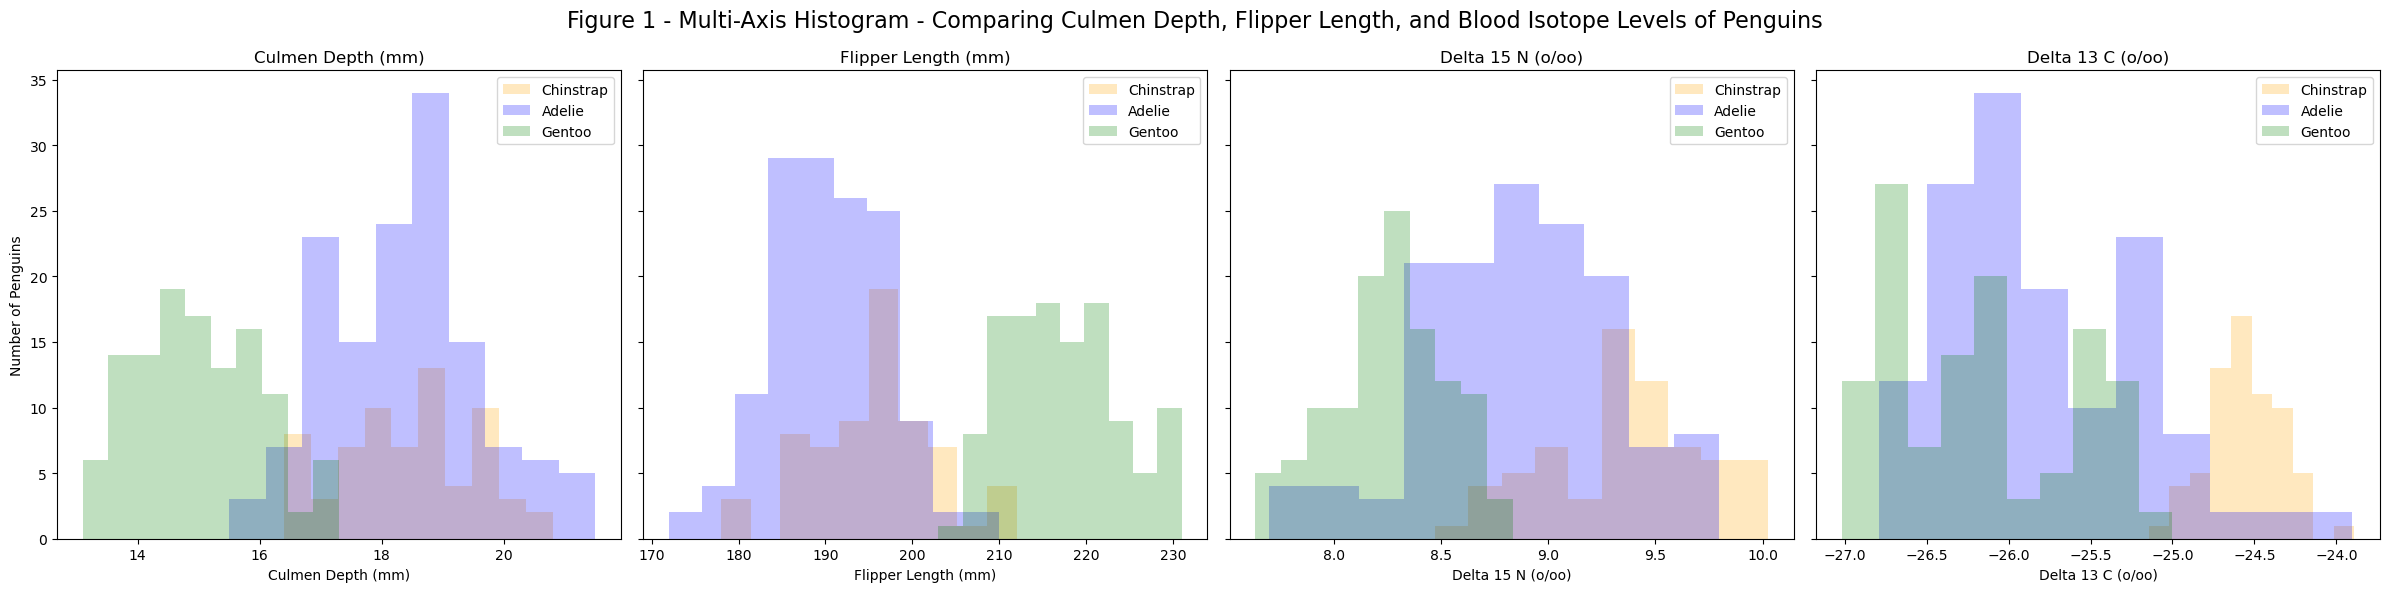

In [15]:
# What each plot in the figure will compare across species.
multiaxis_comparisons = [ "Culmen Depth (mm)", "Flipper Length (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

#Create a figure with the number of plots being the number of elements/features that will be compared.
fig, axarr = plt.subplots(1, len(multiaxis_comparisons), figsize=(24,6), sharey = True)
axarr[0].set_ylabel('Number of Penguins')

#Assings a unique axis for each feature that will be compared
plot_count = {comparison: i for i, comparison in enumerate(multiaxis_comparisons)}

#Actual creation of a histogram for each feature to be compared
for comparison in multiaxis_comparisons:

    #Assignment of comparison to respective plot
    count = plot_count[comparison]
    axarr[count].set_title(comparison)
    
    # Iterate over each species to plot data
    for species in penguinSpecies:

        #Subset into dataframe only containing the specific species
        data_subset = penguins_explore[penguins_explore['Species'] == species]

        #Extract specific feature being plotted and plot its histogram
        feature_values = data_subset[comparison]
        axarr[count].hist(feature_values, label=species, alpha=0.25, color=color_dict[species])

    axarr[count].set_xlabel(comparison)

# Adding a legend
for axis in axarr:
    axis.legend()

fig.suptitle('Figure 1 - Multi-Axis Histogram - Comparing Culmen Depth, Flipper Length, and Blood Isotope Levels of Penguins', size = 16)
plt.tight_layout()
plt.show()

##### Analysis of Multi-Axis Histogram

 - Based on visual analysis of the histograms, both culmen depth and flipper length remain as plausible variables with which we can base our model off of. Both separate Gentoo penguins from Chinstrap and Adelie paenguins, as they have noticeable shallower culmens and longer flippers than Chinstraps and Adelies soleley based on visual analysis of the pertinent graphs. What emerged as a surprise was how δ¹⁵N values stratify penguin species, given our previous analysis of the pertinent table. The histogram of δ¹⁵N values shows how Gentoo penguins tend to have lower values, followed by Adelie penguins in the middle, and finally Chinstrap penguins who tend to have the highest values. This introduces δ¹⁵N values as a possible feature to base modeling off of. Similar things can be said for δ¹³C values, as there is a similar stratification and ordering of species as with δ¹⁵N values: Gentoo penguins tend to have lower values, followed by Adelie penguins in the middle, and finally Chinstrap penguins who tend to have the highest values. However, the data is less stratified, although chinstraps have distinctly higher values than the rest of the species unlike with δ¹⁵N values. Thus, δ¹⁵N values seem to be a better candidate for modeling than δ¹³C values, although identifying Chinstraps specifically could be assisted with by the latter measure.

#### Multi-Axis Scatterplot 
- Now we will look at a multi-axis scatteplot comparing the Culmen Length, Culmen Depth, and Flipper Length of each species to their respective Body Mass. This will analyze whether species can be differentiated from eachother on the basis of quantitative physical features/variables.

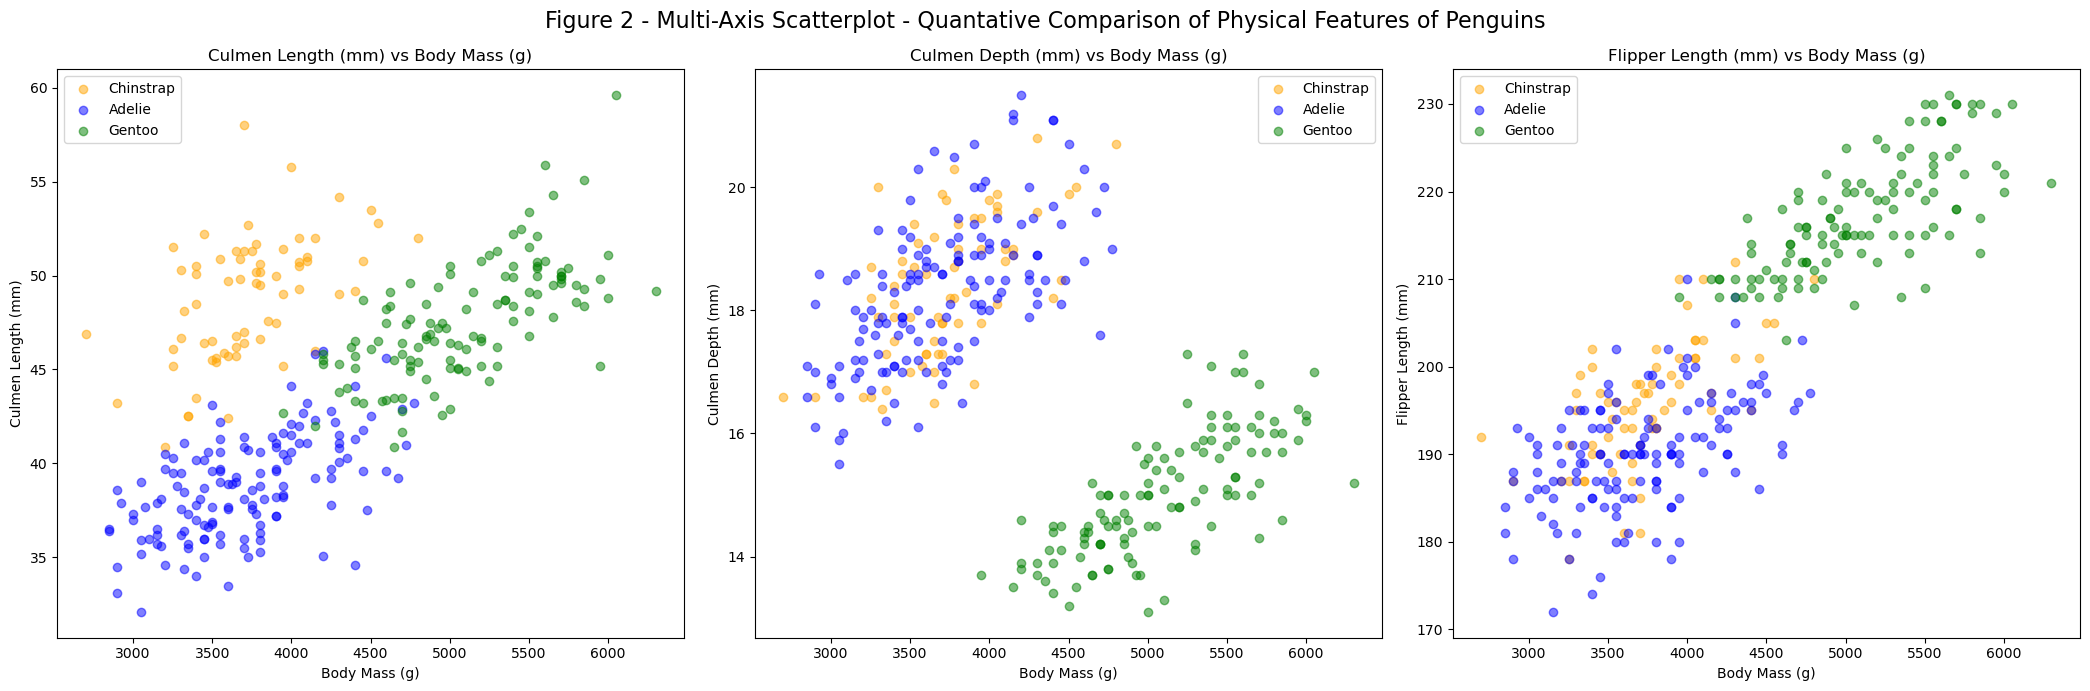

In [16]:
#Specifying the other physical features we will compare body mass to
y_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']


fig, ax = plt.subplots(1, len(y_cols), figsize=(21, 7))

# Enumrate assigns a specific plot to each feature that will be compared to body mass
for i, col in enumerate(y_cols):

    #Iterate over each species to plot a scatterplot for the specific feature being compared to their body mass
    for spec in penguinSpecies:

        #Subset into a specific species for plotting
        data_subset = penguins_explore[penguins_explore['Species'] == spec]

        #Scatter plot with body mass on x-axis and pertinent feature on y-axis
        ax[i].scatter(data_subset['Body Mass (g)'], 
                      data_subset[col], 
                      label=spec, 
                      color=color_dict[spec],
                      alpha=0.5)
        
        #Labelling graphs
        ax[i].set_xlabel('Body Mass (g)')
        ax[i].set_ylabel(col)
        ax[i].set_title(f'{col} vs Body Mass (g)')

for axis in ax:
    axis.legend()

fig.suptitle('Figure 2 - Multi-Axis Scatterplot - Quantative Comparison of Physical Features of Penguins', size = 16)
plt.tight_layout()
plt.show()

##### Analysis of Multi-Axis Scatterplot

- When comparing Culmen Depth, Culmen Length, and Flipper Length to Body Mass, the comparison pair that emerges as the best potential pair for modeling species is the one that has unique clusters for each species with minimal overlap : **Culmen Length v. Body Mass**. Although Culmen Depth v. Body Mass and Flipper Length v. Body Mass isolate Gentoos into their own cluster, one cannot differentiate Adelies from Chinstraps as the two share a cluster in both cases. Meanwhile, Culmen Length v. Body Mass has three distinct clusters, one for each species, even though there is some overlap. This issue can be mitigated during modeling due to the additional analysis provided by a not-yet chosen categorical variable. 

#### Boxplot of Adelies vs Island

- Looking at the above data tables, a distinct feature about Adelies was that they were the only species to exist on more than one island. Thus, we will create 3 different boxplots for Adelies' body mass, one for each island. Because body mass is an encompassing physical feature, this plot will allow us to examine the extent of physical difference of one species across multiple islands.

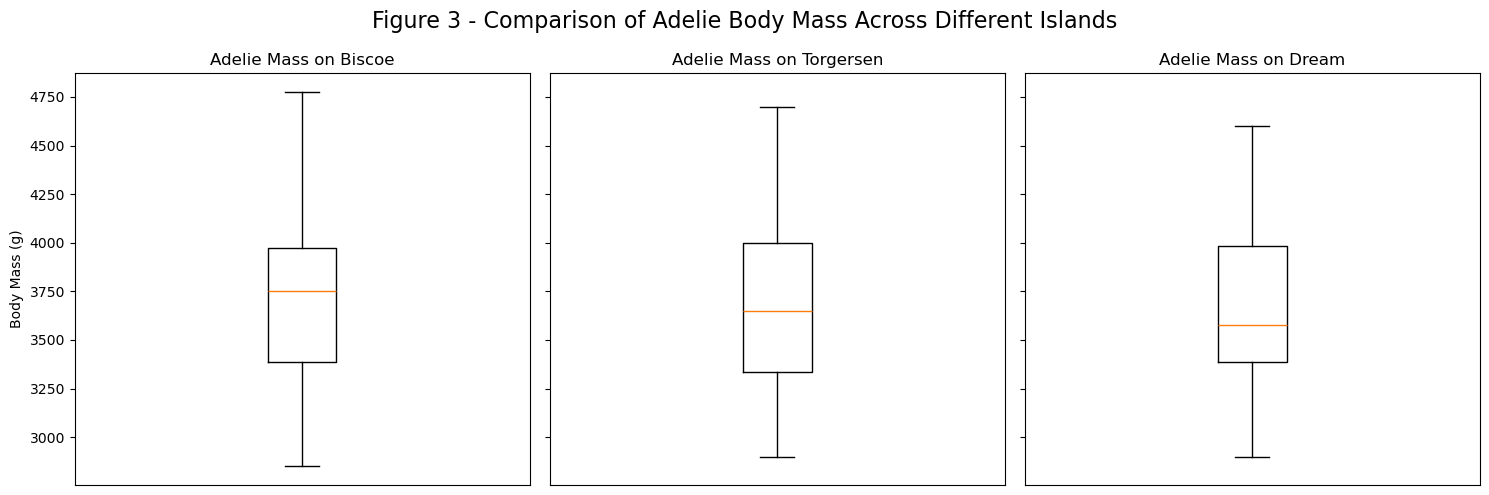

In [17]:
# Filter the data for Adelie species
adelie_data = penguins_explore[penguins_explore['Species'] == 'Adelie']

# Create a set of unique islands
unique_islands = set(penguins_explore['Island'])

# Creation of a plot for each island
fig, axarr = plt.subplots(1, len(unique_islands), sharey=True, figsize=(15, 5))
axarr[0].set_ylabel('Body Mass (g)')


# Create a box plot for each island
for i, island in enumerate(unique_islands):

    #Subset into penguin data for a specific island. Then plot
    island_data = adelie_data[adelie_data['Island'] == island]['Body Mass (g)']
    axarr[i].boxplot(island_data)
    
    # Remove x-tick values and set title for each boxplot identifying it to an island
    axarr[i].set_xticks([]) 
    axarr[i].set_title( "Adelie Mass on " + f'{island}')

fig.suptitle('Figure 3 - Comparison of Adelie Body Mass Across Different Islands', size = 16)
plt.tight_layout()
plt.show()

##### Analysis of Intra-Species Boxplots based on Island

- When comparing Body Masses (g) of Adelie penguines on the three different islands of the data set (Torgersen, Biscoe, and Dream), there does not seem to be a discernable difference between the three islands. This demonstrates that when determining what categorical variable to use for the machine learning model, island is not a useful metric. Thus, it will be elimniated from our pool of variables before we proceed with feature selection. **This is reflected in the earlier Data Import and Cleaning Section.**

# Feature Selection

In this section, we will select a distinct set of 3 features (2 quanitative & 1 qualitative) for each of the following machine learning models that will be implemented in a future section (Modeling) to predict a penguin's species:
- **Support Vector Machine**
- **K-Nearest Neighbors**
- **Multinomial Logistic Regression**

### Creating All Possible Combinations of Columns for Feature Selection

Because the specifications on this project rely on a model using 2 quanititative and 1 qualitative variable, we will employ a function called `feature_combinations` that creates all possible combinations of 3 features that can be used by any of the aforementioned models that will be used in this project.

We will do this using `itertools`, which includes functions for generating combinations.

In [18]:
import itertools

def feature_combinations (df_data):

    """
    Input/Function Parameters:
        df_data: The input dataframe containing the data (i.e. columns of features) to be used for creating feature combinations.

    Function:
        The purpose of this function is to create a list of feature combinations (list of lists).
        This list will be modeling purposes by combining qualitative and quantitative columns from the given DataFrame.

        This is accomplished via the following steps:
            1. Separate qualitative and quantitative columns from each other.
                - Qualitative columns: ['Region', 'Sex']. Remember 'Island' was excluded due to findings in Exploratory Analysis
                - Quantitative columns: All other columns in the dataframe that are not qualitative.
            2. Create an empty list to store the combinations.
            3. For each qualitative variable, append each combination of two quantitative variables to the list. This is done using itertools to generate combinations of quantitative variables.

    Returns:
        A list of lists, where each sublist contains one qualitative variable and two quantitative variables. These combinations are intended to be used for modeling.
    """

    #Separate qualitative and quantitative columns from eachother for the combinations
    qualitative = ['Region', 'Sex']
    quantitative = [feature for feature in df_data.columns if feature not in qualitative]


    #Create an Empty List of combinations to be used for modeling
    modeling_combinations = []

    #Go through each qualitative variable, and append each combination of quantitative variables calculated by itertools
    for quality in qualitative:
        #Appending qualitative variable to each combination of qualitative variables
        for quantitative_combo in itertools.combinations(quantitative, 2):
            modeling_combinations.append([quality, quantitative_combo[0], quantitative_combo[1]])
    
    return modeling_combinations

We now run `feature_combinations` to get all possible combinations of features for modeling.

In [19]:
feature_combinations (X_train)

[['Region', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Region', 'Culmen Length (mm)', 'Flipper Length (mm)'],
 ['Region', 'Culmen Length (mm)', 'Body Mass (g)'],
 ['Region', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
 ['Region', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
 ['Region', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
 ['Region', 'Culmen Depth (mm)', 'Body Mass (g)'],
 ['Region', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
 ['Region', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
 ['Region', 'Flipper Length (mm)', 'Body Mass (g)'],
 ['Region', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
 ['Region', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
 ['Region', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
 ['Region', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
 ['Region', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
 ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
 ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
 ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
 ['Sex', 'Culmen Length

We now will store this list of combinations into `column_combos` which will be used for cross validation in order to select hyperparameters for the aforementioned Machine Learning Models.

In [20]:
column_combos = feature_combinations (X_train)

### Using Cross Validation for Feature Selection
Because we cannot use our test data before training our model, but we still must identify which columns/features are best for each machine learning model, we employ a method called `cross_val_score` from `sklearn`. Cross-validation works by further splitting the training data into smaller training and testing subsets. This allows us to evaluate how a model performs when trained on one subset and tested on another, simulating the behavior on unseen data.

The parameter `cv`, or the number of cross-validations, determines how many unique cross-validations we perform for a given set of features. It specifies the number of unique train-test splits of the original training data that will be tested. During each iteration, the model is trained on `cv-1` folds and validated on the remaining fold. This process is repeated `cv` times, with each fold serving as the validation set once. We will use `cv` = 5 for all cross validation.

By averaging the scores from each cross-validation, we can obtain a more reliable estimate of the model's performance for each set of features. This helps ensure that  feature selection is not biased by any particular split of folds of the data.


Now that we have our column combinations, we will create an all-inclusive function called `model_column_matcher` that doesn't return anything, but rather prints out cross validation scores of the top 5 column combinations for each of the three machine learning models we will be using.

**Because we are only selecting which features will be used, we are forced to use the default hyperparamets of each machine learning model.** The actual influence of the hyperparameters is explained in the Modeling section. For the hyperparameters we will be identifying via cross validation, the default values used for feature selection are:

- K-Nearest Neighbors : n_neighbors = 5
- Support Vector Machine :  gamma = 1 / (n_features * X_train.var()). Gamma has no default value, but is scaled based on the number of features and the variance of the training data.
- Multinomial Logistic Regression: C = 1.0

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm

def model_column_matcher (column_combinations):

    """
    Input/Function Parameters:
        column_combinations: A list of feature combinations (each combination is a list of column names) to be evaluated for model training.

    Function:
        The purpose of this function is to cross-validate different combinations of features for specified machine learning models and identify the top-performing combinations for each model.

        This is accomplished via the following steps:
        1. Initialize instances of machine learning models with default hyperparameters.
           - Models used: KNeighborsClassifier, SVM (Support Vector Machine), and LogisticRegression.

        2. For each model, perform the following steps:
           - Initialize an empty list to store scores for each feature combination.
           - For each feature combination, calculate the cross-validation score using `cross_val_score` with 5 folds and append the score and corresponding feature combination to the list as a tuple.
           - Sort the list of scores in descending order to identify the top 5 feature combinations.
           - Print the top 5 feature combinations and their respective scores for the current model.

    Returns:
        This function prints the top 5 feature combinations and their scores for each machine learning model. It does not return any value.
        
    """
    #Initialization of Model Instances with default hyperparameters
    knn = KNeighborsClassifier()
    SVM = svm.SVC()
    LR = LogisticRegression(multi_class='multinomial', max_iter = 1000)


    machineLearningModels = [knn, SVM, LR]

    #Cross Validation of all feature combinations for each model
    for model in machineLearningModels:
        print ("\033[1mTraining with: " + str(model) + "\033[0m")

        #Empty List of column scores that will be populated for every model
        column_scores = []

        #Each feature combination receives a cross validation score for the current model being iterated through
        for cols in column_combinations:
            x = cross_val_score(model, X_train[cols], y_train, cv = 5).mean()

            #Append the column combination and respective score to column_scores
            column_scores.append((cols, x))

        #Simple lambda function to sort tuples in column_scores in descending order
        column_scores.sort(key=lambda x: x[1], reverse=True)
        top_5_combinations = column_scores[:5]

        #Identification of the top 5 feature combinations for a particular model
        for element in top_5_combinations:
            print("Columns: " + str(element[0]) +  " | Score: " + str(np.round(element[1], 3)))
        print ()

model_column_matcher(column_combos)

Training with: KNeighborsClassifier()
Columns: ['Region', 'Culmen Length (mm)', 'Culmen Depth (mm)'] | Score: 0.961
Columns: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] | Score: 0.961
Columns: ['Region', 'Culmen Length (mm)', 'Flipper Length (mm)'] | Score: 0.946
Columns: ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'] | Score: 0.946
Columns: ['Sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'] | Score: 0.938

Training with: SVC()
Columns: ['Region', 'Culmen Length (mm)', 'Culmen Depth (mm)'] | Score: 0.857
Columns: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] | Score: 0.857
Columns: ['Region', 'Culmen Length (mm)', 'Flipper Length (mm)'] | Score: 0.771
Columns: ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'] | Score: 0.771
Columns: ['Region', 'Culmen Depth (mm)', 'Flipper Length (mm)'] | Score: 0.767

Training with: LogisticRegression(max_iter=1000, multi_class='multinomial')
Columns: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] | Score: 0.981
Columns: ['Sex

#### Analysis of Feature Selection

Although the `model_column_matcher` function output the 5 most successful column combinations (based on the cross-validation score) for each machine learning algorithm, for **Support Vector Machine** and **K-Nearest Neighbors**, the following column combinations both had the same and highest cross-validation score. This means that these column combinations performed best during cross-validation using the training data and are predicted to perform best against the unseen test data.

The combinations are:

- ['Region', 'Culmen Length (mm)', 'Culmen Depth (mm)']
- ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 

These column combinations were thus equally effective in predicting the species when using cross-validation on the training data for both training and testing purposes for both for **Support Vector Machine** and **K-Nearest Neighbors**.

For **Multinomial Logistic Regression**, the column combination with the highest cross-validation score was:
- ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] | Score: 0.981

Thus, for the sake of modeling, we will use the following combination of columns as it led to the highest cross validation score for all three machine learning models when their default hyperparameters were used:
- **['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']**

# Modeling
Here is a brief overview/description of how the chosen Machine Learning Models work:

- **Support Vector Machine**: This model constructs hyperplanes in a, for our purposes, 3-D space to separate different species of penguins. It uses a one-vs-one strategy for species classification, creating a separate hypeplane for each pair of species. The `gamma` parameter controls the influence of individual data points on the decision boundaries.

- **K-Nearest Neighbors**: This model classifies data points based on the labels of their nearest neighbors (i.e. most similar penguins). It calculates the distance between points and assigns the most common label among the closest `n_neighbors`.

- **Multinomial Logistic Regression**: This model generalizes logistic regression to handle multiple species (greater than 2) by modeling the probabilities of different outcomes. The model fits multiple logistic functions to the data.


Before implementing the three chosen Machine Learning Models, we will further clean our training and testing predictors to only have data from the following columns: ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']. The reasoning for choosing these three specific columns is detailed in the previous section.

In [22]:
# Reduce training and testing data frames to only include features that will be used in Machine Learning Models
new_X_train = X_train[['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
new_X_test = X_test[['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']]

In [23]:
new_X_train.head()

,Sex,Culmen Length (mm),Culmen Depth (mm)
193,0,46.2,17.5
66,0,35.5,16.2
188,0,47.6,18.3
138,0,37.0,16.5
249,1,50.0,15.3


As we can see, our predictor data frames only include the features chosen for modeling in the Feature Selection column.

### General Cross-Validation for Hyperparameter Section

All three of the three chosen models,  **Support Vector Machine**, **K-Nearest Neighbors**, and **Multinomial Logistic Regression**, will take in a hyperparameter upon initialization that influences model decision making. Before implementing these models, we must converge upon the best hyperparameters for each model using cross-validation. Feature Selection as previously mentioned before utilized default hyperparameters for each model.

For **Support Vector Machine**, the model will create a planar hyperplane to separate data points in 3D space, given three predictor variables. For predicting the species of a penguin, the model by-default uses a one-vs-one strategy to handle the three species. This means a hyperplane is created to separate each pair of species. This results in three hyperplanes, each separating a distinct pair of the three different clusters of penguin species. However, We **will use cross-validation to determine gamma**, a hyperparameter that controls how much influence each training data point has on the decision boundaries imposed by the model's hyperplanes.

For **K-Nearest Neighbors**, we will use cross-validation to determine **n_neighbors**, which is how many of the training data points the model will compare a new data point to to determine what species it belongs to.

For **Multinomial Logistic Regression**, we will use cross-validation to determine **C**, which is a regularization parameter. This parameter controls the extent of overfitting to our training data the Logistic Regression model undertakes.

**We will once again utilize cross validation, but this time rather than using cross validation to determine what features to use, we will keep the features each model is trained on constant, rather comparing the performance of the model with different hyperparameter values.**


Because we need to choose hyperparameters for all three machine learning models, we will iterate through each model and test their hyperparameters in a single block of code, rather than cross-validating each model separately. This was not made into an encompassing function, as it would be hard to account for the unique syntax and necessary default hyperparameters of each machine learning model. However, a modified docstring is included as this is an integral piece of code.

In [24]:
from sklearn.model_selection import cross_validate

"""
Hyperparameter Selection for Machine Learning Models Using Cross-Validation

This code block performs hyperparameter tuning for three machine learning models: K-Nearest Neighbors, Logistic Regression, and Support Vector Machine.
It uses cross-validation to determine the best hyperparameters for each model, ensuring optimal performance.

Steps:
1. Initialize dictionaries to keep track of the best parameters and scores for each model.

2. Define the range of hyperparameters to test:
   - Neighbors for K-Nearest Neighbors
   - Regularization parameter C for Logistic Regression
   - Gamma for Support Vector Machine

3. Perform cross-validation for each model:
   - For K-Nearest Neighbors, iterate over the range of neighbors and perform cross-validation. Update the best number of neighbors and the highest score.
   - For Logistic Regression, iterate over the range of regularization parameters and perform cross-validation. Update the best C value and the highest score.
   - For Support Vector Machine, iterate over the range of gamma values and perform cross-validation. Update the best gamma value and the highest score.

4. Append the scores for each hyperparameter to the respective model's dictionary for plotting/visual analysis of hyperparameter pefromance. 

5. Print the best hyperparameters and corresponding scores for each model that will be used for modelling penguin species.

"""


# Keep track of best parameters and scores for each model. Set score to -1 so that first cross validation for each model will serve as benchmark for future iterations
parameter_dictionaries = {
    'knn': {'overall_scores': [], 'best_neighbors': 0, 'score': -1},
    'logistic': {'overall_scores': [],'best_C': 0, 'score': -1},
    'svm': {'overall_scores': [], 'best_gamma': 0, 'score': -1}
}

# Hyperparameter ranges - arbitrarily chosen
neighbors = [i for i in range(1, 30)]
logistical_C = np.arange(0.05, 5, 0.05)
gammas = np.arange(0.01, 1, 0.01) 

# Cross-validation for K Nearest-Neighbors 
for num_neighbors in neighbors:

    #Initialize KNN model with specified neighbors
    knn = KNeighborsClassifier(n_neighbors = num_neighbors)

    #Cross Validate knn model with training data 
    scores = cross_validate(knn, new_X_train, y_train, cv = 5)['test_score']
    curr_score = scores.mean()
    
    #Updating of best n_neighbors hyperparameter
    if curr_score > parameter_dictionaries['knn']['score']:
        parameter_dictionaries['knn']['best_neighbors'] = num_neighbors
        parameter_dictionaries['knn']['score'] = curr_score
    
    #Bookkeeping of performance of all hyperparameters during cross validation
    parameter_dictionaries['knn']['overall_scores'].append(curr_score)

# Cross-validation for Logistic Regression
for regulator in logistical_C:

    #Initialize Logistic Regression model with specified C
    LR = LogisticRegression(multi_class='multinomial', C = regulator, max_iter=1000)

    #Cross Validate LR model with training data 
    scores = cross_validate(LR, new_X_train, y_train, cv=5)['test_score']
    curr_score = scores.mean()
    
    #Updating of best hyperparameter
    if curr_score > parameter_dictionaries['logistic']['score']:
        parameter_dictionaries['logistic']['best_C'] = regulator
        parameter_dictionaries['logistic']['score'] = curr_score
        
    #Bookkeeping of performance of all hyperparameters during cross validation
    parameter_dictionaries['logistic']['overall_scores'].append(curr_score)

# Cross-validation for SVM
for g in gammas:

     #Initialize SVM with specified gamma
    SVM = svm.SVC(gamma = g)

    #Cross Validate SVM with training data 
    scores = cross_validate(SVM, new_X_train, y_train, cv=5)['test_score']
    curr_score = scores.mean()
    
    #Updating of best hyperparameter
    if curr_score > parameter_dictionaries['svm']['score']:
        parameter_dictionaries['svm']['best_gamma'] = g
        parameter_dictionaries['svm']['score'] = curr_score
        
    #Bookkeeping of performance of all hyperparameters during cross validation
    parameter_dictionaries['svm']['overall_scores'].append(curr_score)

# Print the best hyperparameters and scores for each model
print("Best KNN n_neighbors: ", parameter_dictionaries['knn']['best_neighbors'], " with score: ", parameter_dictionaries['knn']['score'])
print("Best Logistic Regression C: ", parameter_dictionaries['logistic']['best_C'], " with score: ", parameter_dictionaries['logistic']['score'])
print("Best SVM gamma: ", parameter_dictionaries['svm']['best_gamma'], " with score: ", parameter_dictionaries['svm']['score'])


Best KNN n_neighbors:  3  with score:  0.9767722473604827
Best Logistic Regression C:  1.1500000000000001  with score:  0.9883861236802414
Best SVM gamma:  0.37  with score:  0.9844645550527904


We will now plot the scores for each hyperparameter tested for each of the three machine learning models, to see the disparity in scores.

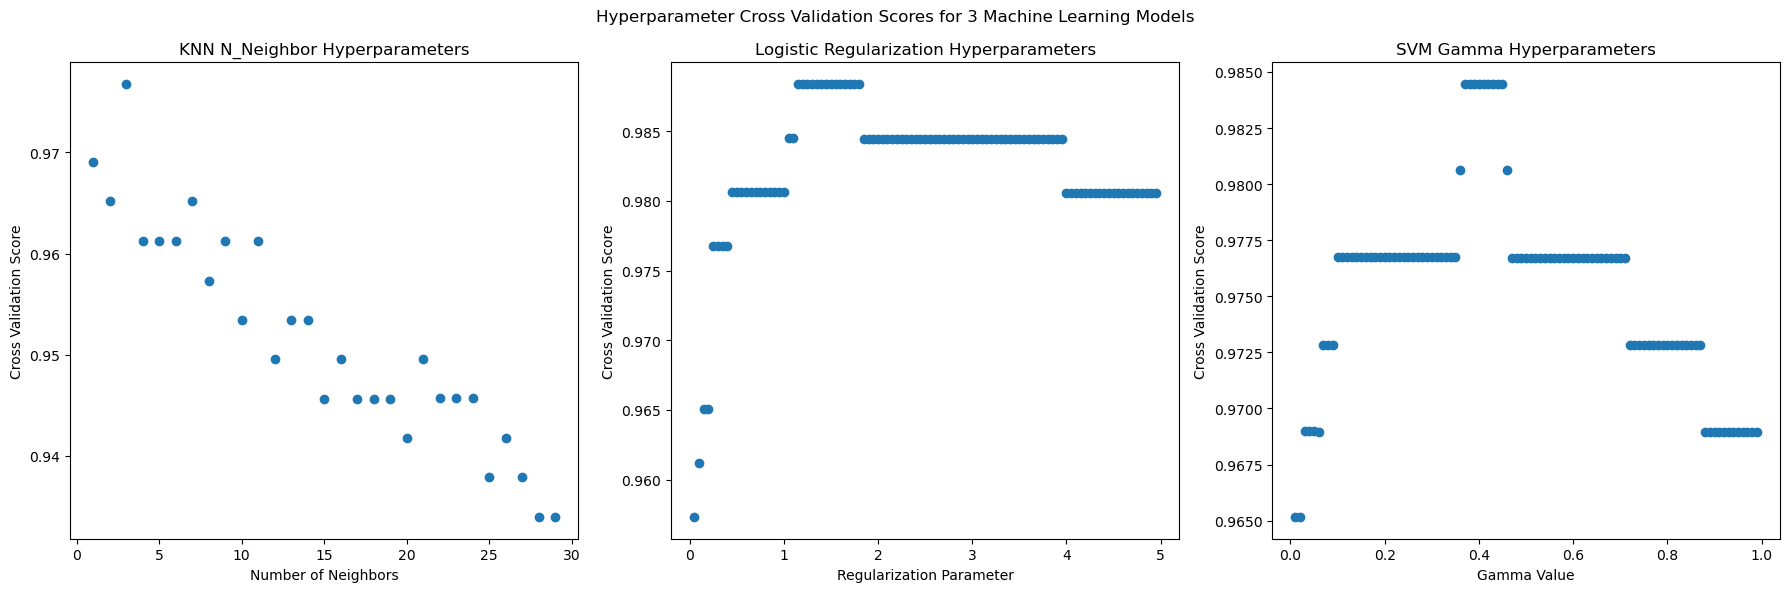

In [25]:
# Add Hyperparameter lists to respective parameter dictionary for plotting
parameter_dictionaries['knn']['hyperparameters'] = neighbors
parameter_dictionaries['logistic']['hyperparameters'] = logistical_C
parameter_dictionaries['svm']['hyperparameters'] = gammas

# Create subplots
fig, ax = plt.subplots(1, len(parameter_dictionaries.keys()), figsize=(18, 6))

# Iterate over the keys and plot the data. Enumeration assigns each model a plot
for index, model in enumerate(parameter_dictionaries.keys()):

    #Scatter plot of cross validation score for each hyperparameter tested for a given model.
    ax[index].scatter(parameter_dictionaries[model]['hyperparameters'], parameter_dictionaries[model]['overall_scores'])
    ax[index].set_ylabel('Cross Validation Score')
    
    #Labelling based on model
    if model == 'knn':
        ax[index].set_xlabel("Number of Neighbors")
        ax[index].set_title("KNN N_Neighbor Hyperparameters")
    elif model == 'logistic':
        ax[index].set_xlabel("Regularization Parameter")
        ax[index].set_title("Logistic Regularization Hyperparameters")
    elif model == 'svm':
        ax[index].set_xlabel("Gamma Value")
        ax[index].set_title("SVM Gamma Hyperparameters")

fig.suptitle('Hyperparameter Cross Validation Scores for 3 Machine Learning Models')
plt.tight_layout()
plt.show()



It seems as though only K-Nearest Neighbors has a distinct "best" hyperparameter to use, as visual analysis of the graphs shows that multiple Logistic Regularization and a few SVM Gamma hyperparameters produce the same highest cross validation score. To remedy this, we will simply use the hyperparameters identified by our iterative code, which are as follows:

- **K-Nearest Neighbors**: n_neighbors = 3
- **Multinomial Logistix Regression**: C = 1.15
- **Support Vector Machine**: gamma = 0.37

Now that we have identified our hyperparameters, we can finally create out models and test them against the previously defined test data. Making the models follows a 3-step process:
1. Import the revelant model.
2. Initialize an instance of the model. 
3. Fit the model on data. 

First, we will import `accuracy_score`, a function from the `sklearn.metrics` module that calculates the accuracy of our models against unseen test data. We will also import `ConfusionMatrixDisplay`, a function from `sklearn.metrics` that displays a confusion matrix identifying weaknesses in our model (in other words, what data our model predicted incorrectly.)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

Second, we will define a function called `plot_regions`, provided in Lecture 21. This function will plot our model's decision regions, as well as overlay all points from the penguins dataset, training and testing.

In [27]:
from matplotlib.colors import ListedColormap

def plot_regions(c, X, y, title, species_names):
    """
    Parameters:
    c : The trained machine learning model.
    X : Dataframe of the predictor features, including 'Sex', 'Culmen Length (mm)', and 'Culmen Depth (mm)'.
    y : The corresponding species labels of penguins
    title : The title for the entire plot.
    species_names : A list of species names for legend labels.

    Function:
    This function generates decision region plots for a classification model, showing how the model classifies data points based on two predictor variables 
    (Culmen Length and Culmen Depth) for male and female penguins separately. Functionality was provided from Lecture 21 of PIC 16A.

    Returns:
    None: This function displays the plot and does not return any values.
    """
    
    #Creation of a figure for Decision Regions
    fig, axarr = plt.subplots(1, X['Sex'].nunique(), figsize = (24,8))

    #Subset data into 2 dataframes based on whether or not penguin is male or female
    female_df = X[X['Sex'] == 0]
    male_df = X[X['Sex'] == 1]  

    #Map dataframes to strings for plot labelling
    gender_dfs = {'Male' : male_df, 'Female' : female_df}

    for index, (gender, df) in enumerate(gender_dfs.items()):

        #For convenience, give names to the two  columns of the data
        x0 = df['Culmen Length (mm)']
        x1 = df['Culmen Depth (mm)']
        
        #Create a grid
        grid_x = np.linspace(x0.min()-1,x0.max()+1,1000)
        grid_y = np.linspace(x1.min()-1,x1.max()+1,1000)
        xx, yy = np.meshgrid(grid_x, grid_y)
        
        #Create a grid for the categorical variable - sex
        if gender == 'female':
            sex_value = 0
        else:
            sex_value = 1
        
        #Creates one grid filled with a constant value for sex that corresponds to that specific plot
        sex_grid = np.full(xx.shape, sex_value)

        # extract model predictions, using the 
        # np.c_ attribute to join together the 
        # two parts of the grid. 
        # array.ravel() converts an multidimensional
        # array into a 1d array, and we use array.reshape()
        # to turn the resulting predictions p 
        # back into 2d
        
        XX = xx.ravel()
        YY = yy.ravel()
        SEX = sex_grid.ravel()
        XY = pd.DataFrame({
            "Sex" : SEX,
            "Culmen Length (mm)" : XX,
            "Culmen Depth (mm)"  : YY
        })
        
        p = c.predict(XY)
        p = p.reshape(xx.shape)
        
        #Use contour plot to visualize the predictions
        axarr[index].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
        
        #Plot the actual data. Use fancy indexing to only use y-values that have the indeces matching the specific gender being plotted
        axarr[index].scatter(x0, x1, c = y[df.index], cmap = "jet", vmin = 0, vmax = 2)
        
        axarr[index].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title = gender)

    # Define the 'jet' colormap
    jet = plt.cm.get_cmap('jet')

    # Create a single legend for the entire figure
    colors = [jet(i / (len(species_names) - 1)) for i in range(len(species_names))]
    handles = [plt.Line2D([0], [0], marker='o', color=color, lw=0) for color in colors]
    labels = species_names
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large', title="Species")


    #Title will be passed in during function call
    fig.suptitle(title, size=16)
    plt.tight_layout()
    plt.show()


X and y will now be redefined using similar logic to the `clean_up` function. The reason we cannot use the `clean_up` function is because that was meant to include all possible features that were candidates to be modeling for feature selection, so no entries could have NaN values. Here, because we have alredy selected our features (Sex, Culmen Length (mm), Culmen Height (mm)), we can get away with the other columns having NaN values.

In [28]:
cols = ["Species", "Culmen Length (mm)", "Culmen Depth (mm)", "Sex"]

#Data frame of relevant penguin data
relevant_penguins = penguins[cols]

#Drop NaN values of the columns actually being modeled and clean up species names
relevant_penguins = relevant_penguins.dropna()
relevant_penguins = relevant_penguins.drop(penguins[penguins["Sex"] == "."].index)
relevant_penguins['Species'] = relevant_penguins['Species'].str.split().str.get(0)

#Separate species from predictor features and encode categorical variable 'Sex'.
X = relevant_penguins.drop(columns=['Species'])
le = preprocessing.LabelEncoder()
X['Sex'] = le.fit_transform(relevant_penguins['Sex'])
relevant_penguins['Species'] = le.fit_transform(relevant_penguins['Species'])
y = relevant_penguins['Species']

#Species_names will be passed into plot_regions function for the legend
species_names = le.classes_


We will now finally actually make our models, as a reminder, here are the chosen hyperparameters:
- **K-Nearest Neighbors**: n_neighbors = 3
- **Multinomial Logistix Regression**: C = 1.15
- **Support Vector Machine**: gamma = 0.37

For each model, we will do the following:
1. Test its accuracy against unseen test data.
2. See what species it guessed incorrectly via a confusion matrix.
3. Visualize its decision making via decision region plots.

### K-Nearest Neighbors Model

First we will test its accuracy on unseen test data.

In [29]:
#Initialize an instance of the model. 
knn = KNeighborsClassifier(n_neighbors = 3)

#Fit the model on data. 
knn.fit(new_X_train, y_train)

#Test model against testing data
predicted_labels = knn.predict(new_X_test)
accruacy = accuracy_score(y_test, predicted_labels) * 100
print ("Accuracy of K-Nearest Neighbors Model in Predicting Penguin Species = " + str(accruacy) + "%")


Accuracy of K-Nearest Neighbors Model in Predicting Penguin Species = 96.96969696969697%


Text(0.5, 1.0, 'Confusion Matrix for Penguin Species Classification Using K-Nearest Neighbors')

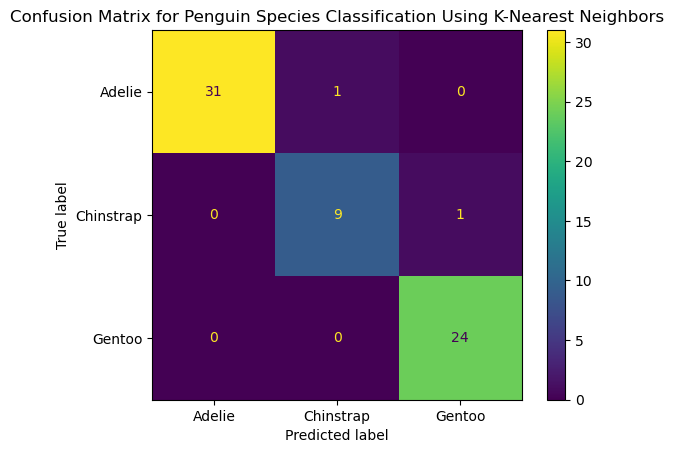

In [30]:
display = ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels, display_labels=species_names)
display.ax_.set_title("Confusion Matrix for Penguin Species Classification Using K-Nearest Neighbors")

/var/folders/dr/s5j2jp6s5mq17k_7pn3h9nc00000gn/T/ipykernel_1334/3302116104.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet')


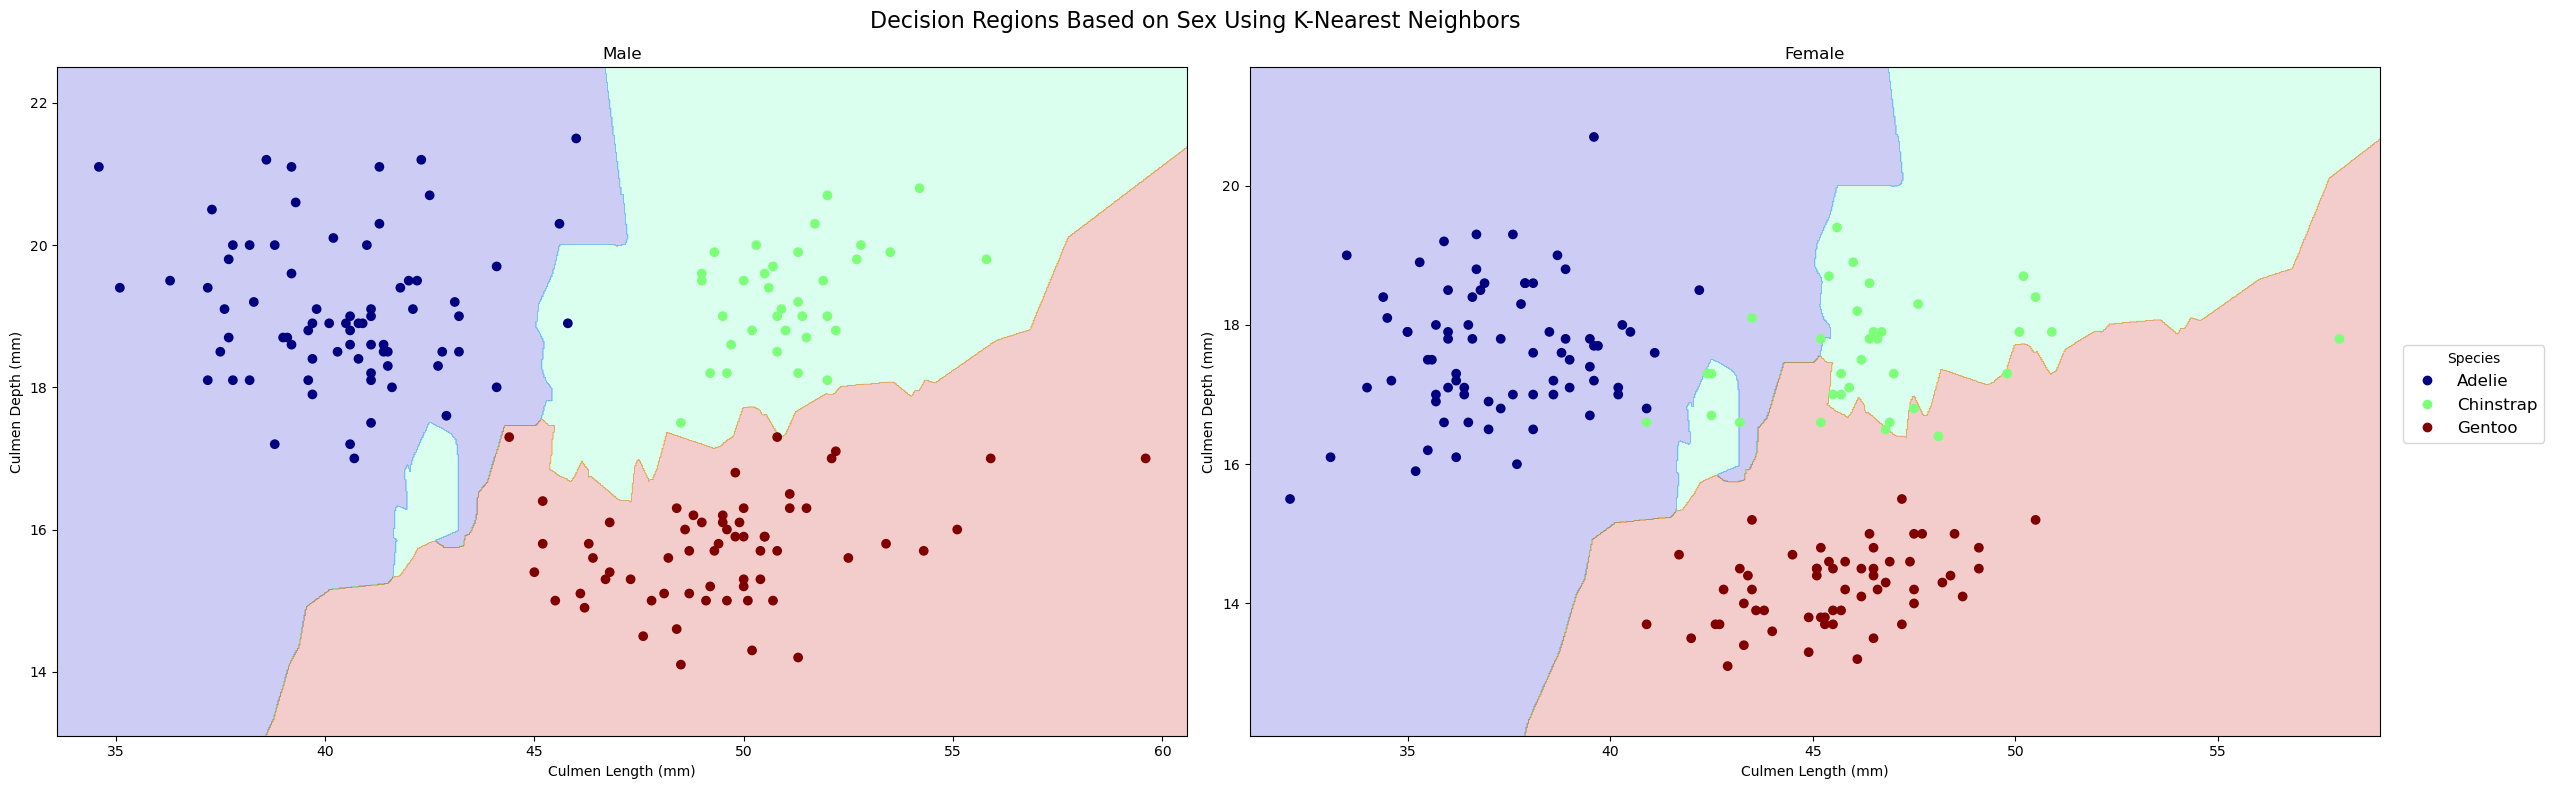

In [31]:
plot_regions(knn, X, y, "Decision Regions Based on Sex Using K-Nearest Neighbors", species_names)

#### Analysis of KNN Mistakes

Our model was very accurate against unseen test data, only making 2 errors out of 66 points of testing data resulting in an accuracy of 96.97%. Looking at the confusion matrix, the confusion of the KNN model surrounded Chinstrap Penguins; one Chinstrap was falsely identified as a Gentoo and one Adelie was falsely identified as an Chinstrap. This confusion is reflected in the decision region plots, as many Chinstrap data points, especially for females, lie on the decision boundaries separating Chinstraps from Adelie and/or Gentoos. It is also worth nothing that KNN based on the decision regions performs much better for males than females, as there are less instances of species being plotted in the wrong region. Analysis for why this may be the case will be talked about in the Discussion Section.

### Multinomial Logistic Regression

First we will test its accuracy on unseen test data.

In [32]:
#Initialize an instance of the model. 
LR = LogisticRegression(multi_class = 'multinomial', C = 1.15, max_iter = 1000)
#Fit the model on data.
LR.fit(new_X_train, y_train)
#Test model against testing data
predicted_labels = LR.predict(new_X_test)
accruacy = accuracy_score(y_test, predicted_labels) * 100
print ("Accuracy of Multinomial Logistic Regression Model in Predicting Penguin Species = " + str(accruacy) + "%")

Accuracy of Multinomial Logistic Regression Model in Predicting Penguin Species = 100.0%


Text(0.5, 1.0, 'Confusion Matrix for Penguin Species Classification Using Multinomial Logistic Regression')

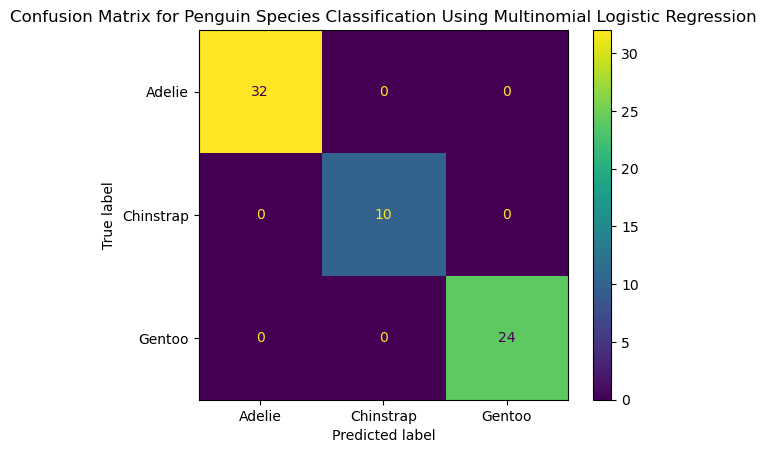

In [33]:
display = ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels, display_labels=species_names)
display.ax_.set_title("Confusion Matrix for Penguin Species Classification Using Multinomial Logistic Regression")

/var/folders/dr/s5j2jp6s5mq17k_7pn3h9nc00000gn/T/ipykernel_1334/3302116104.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet')


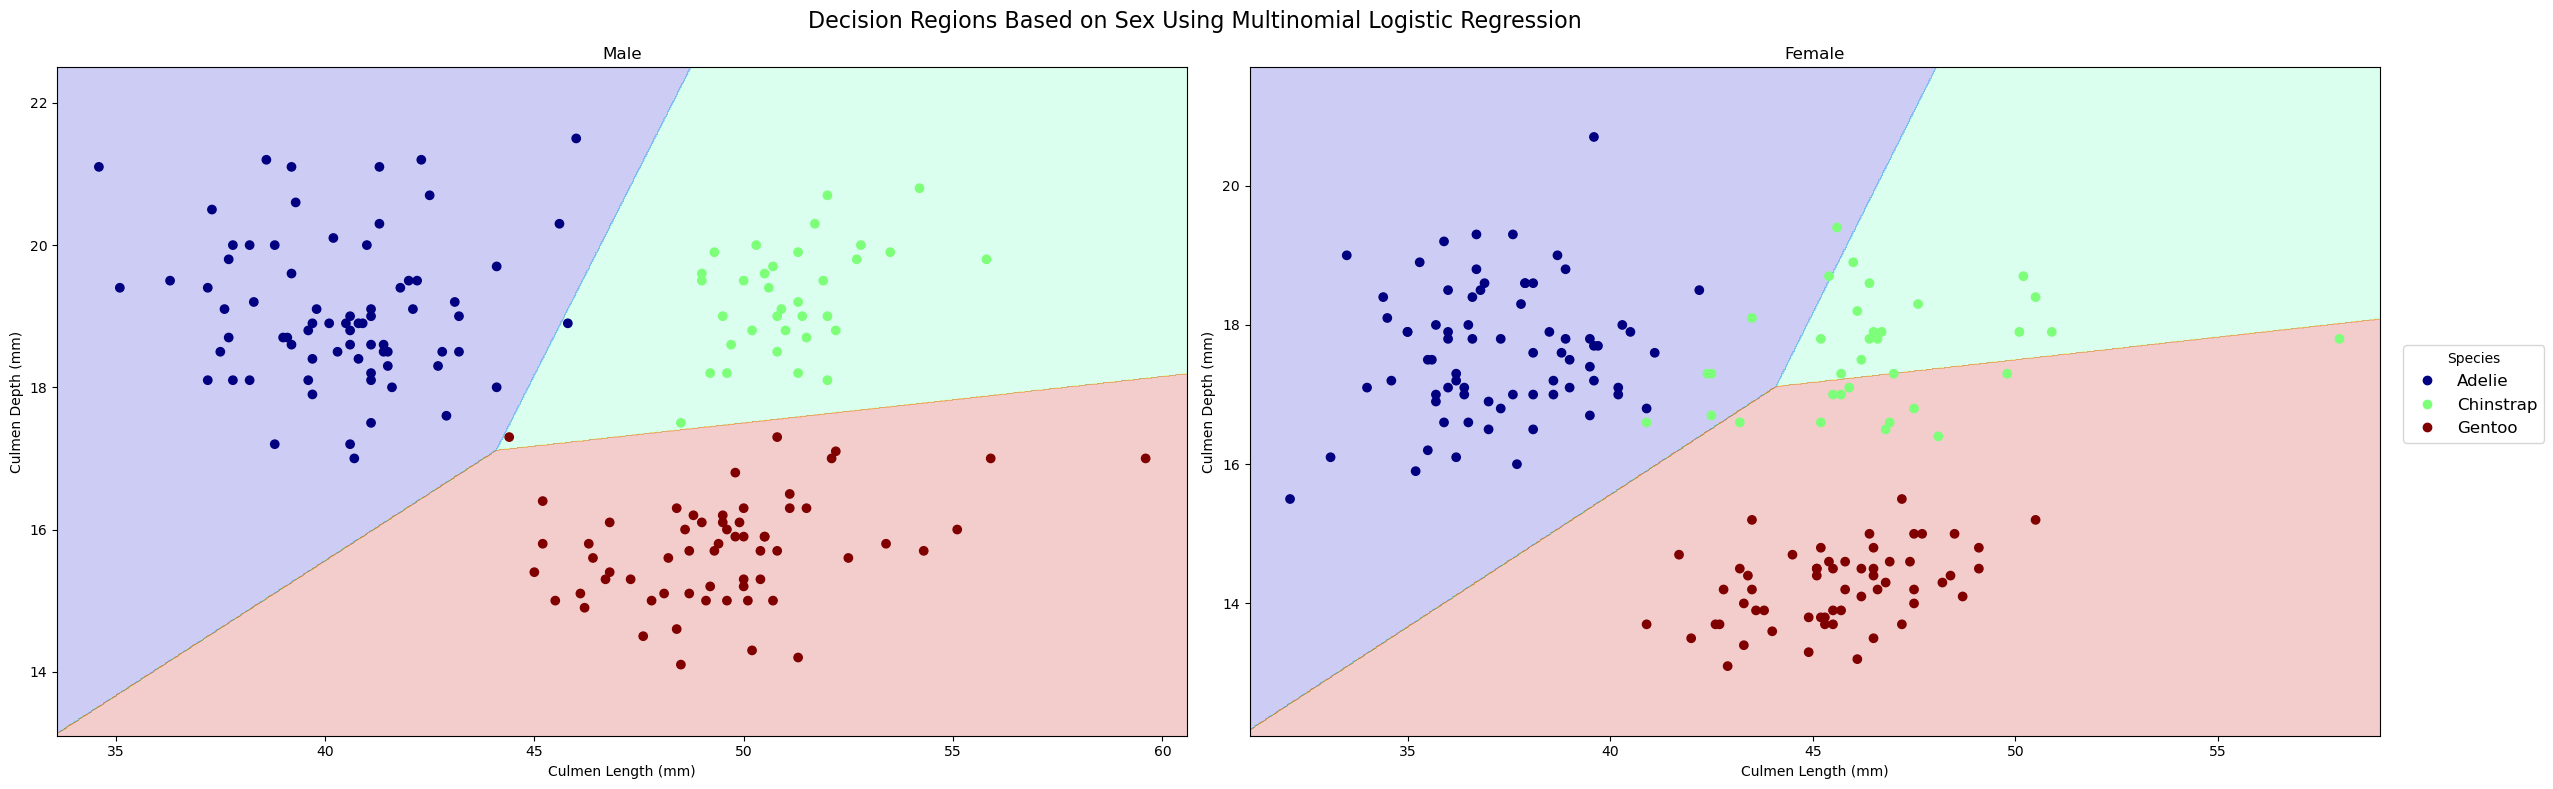

In [34]:
plot_regions(LR, X, y, "Decision Regions Based on Sex Using Multinomial Logistic Regression", species_names)

#### Analysis of Multimomial Logistic Regression Mistakes

Our model was very accurate against unseen test data, making no errors out of 66 points of testing data resulting in an accuracy of 100%. This is reflecting in the Confusion Matrix with no errors. However, this accuracy is not reflected in the decision region plots, sepcficially for female penguins. Similar to the KNN decision regions, the model has trouble accurately providing a decision region for Chinstrap penguins, specifically female ones. Possible reasons for this difficulty will also be examined in the Discussion Section.

We will analyze the performance of the Multonomial Logistic Regression Model on the training data as well to further examine this discrepancy.

In [35]:
predicted_labels = LR.predict(new_X_train)
accruacy = accuracy_score(y_train, predicted_labels) * 100
print ("Accuracy of Multinomial Logistic Regression Model in Predicting Penguin Species TRAINING DATA = " + str(accruacy) + "%")

Accuracy of Multinomial Logistic Regression Model in Predicting Penguin Species TRAINING DATA = 98.83720930232558%


Text(0.5, 1.0, 'Confusion Matrix for Penguin Species Classification Using Multinomial Logistic Regression (TRAINING)')

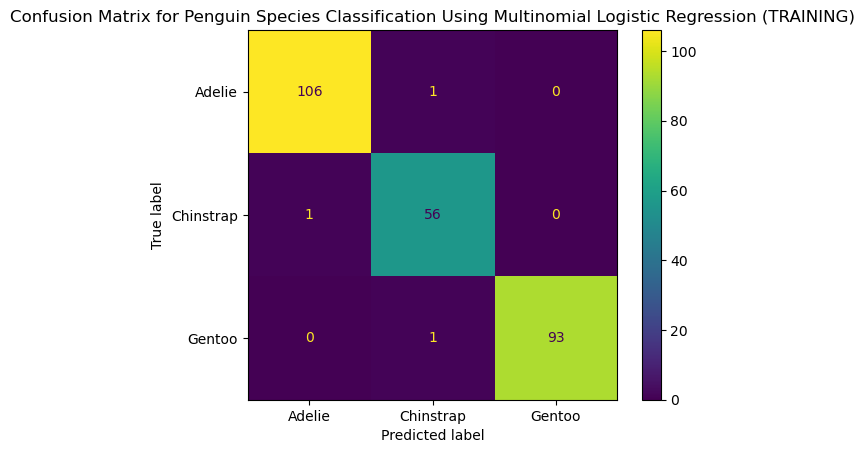

In [36]:
display = ConfusionMatrixDisplay.from_predictions(y_train, predicted_labels, display_labels=species_names)
display.ax_.set_title("Confusion Matrix for Penguin Species Classification Using Multinomial Logistic Regression (TRAINING)")

Unsurprisingly, inaccuracy in the training data also comes from Chinstrap penguins; thus a trend has emerged that our models have difficulty with classifying chinstrap penguins correclty. One Adelie was falsely classigied as a Chinstrap, one Chinstrap was falsely labeled as an Adelie, and one Gentoo was falsely labeled as a Chinstrap. The reason with which this model actually performed better on the test data than training data could be because it is not overfitted to the training data, and the testing data by randomness happen to perfectly fall within the correct decision regions of the model away from the boundaries.

### Support Vector Machine

First we will test its accuracy on unseen test data.

In [37]:
#Initialize an instance of the model. 
SVM = svm.SVC(gamma = 0.37)
#Fit the model on data.
SVM.fit(new_X_train, y_train)
#Test model against testing data
predicted_labels = SVM.predict(new_X_test)
accruacy = accuracy_score(y_test, predicted_labels) * 100
print ("Accuracy of Support Vector Machine in Predicting Penguin Species = " + str(accruacy) + "%")

Accuracy of Support Vector Machine in Predicting Penguin Species = 96.96969696969697%


Text(0.5, 1.0, 'Confusion Matrix for Penguin Species Classification Using SVM')

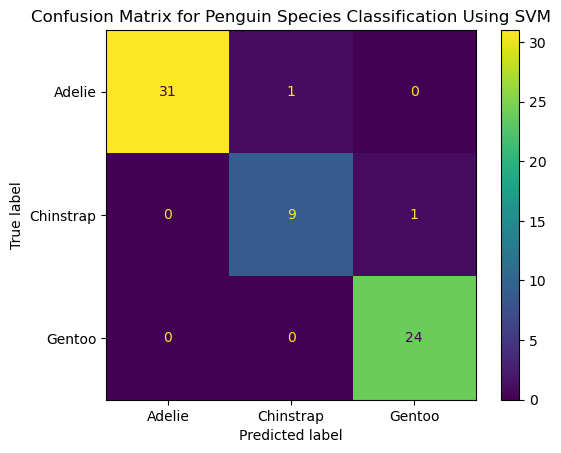

In [38]:
display = ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels, display_labels=species_names)
display.ax_.set_title("Confusion Matrix for Penguin Species Classification Using SVM")

/var/folders/dr/s5j2jp6s5mq17k_7pn3h9nc00000gn/T/ipykernel_1334/3302116104.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = plt.cm.get_cmap('jet')


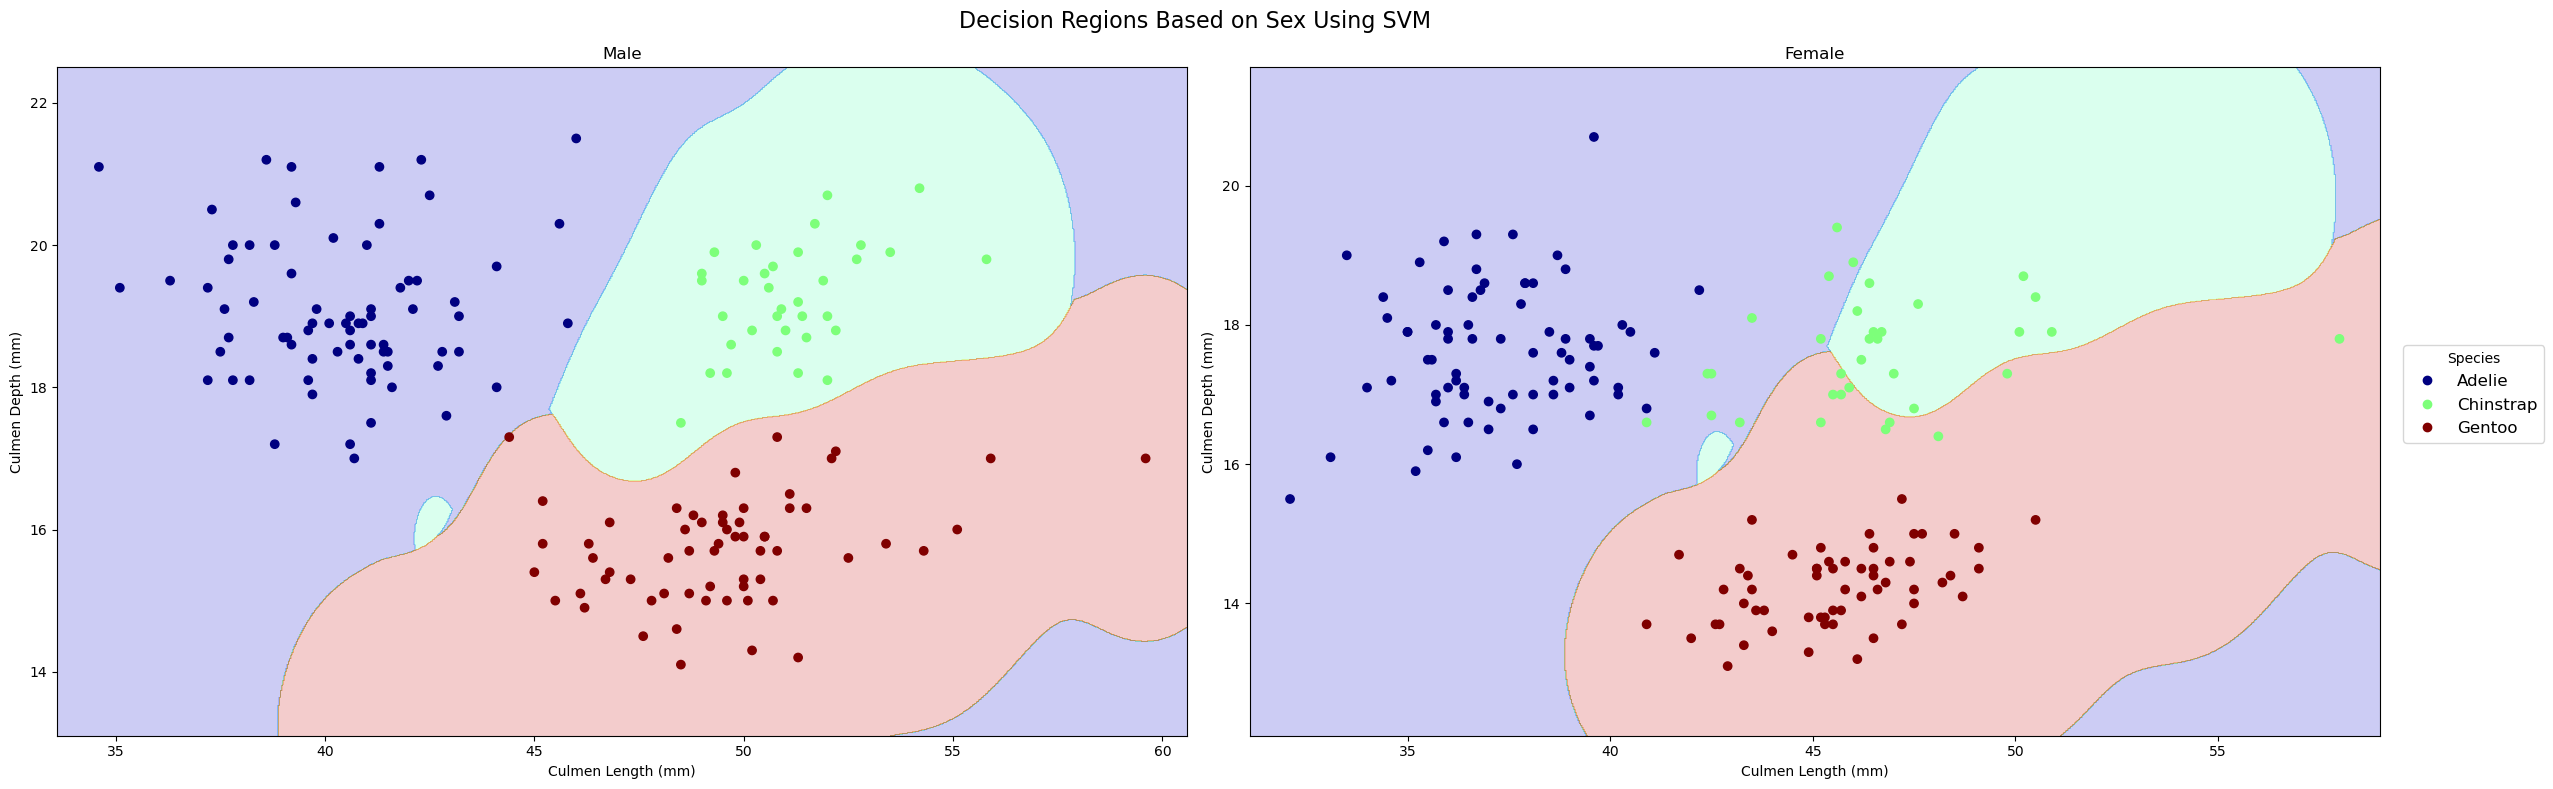

In [39]:
plot_regions(SVM, X, y, "Decision Regions Based on Sex Using SVM", species_names)

#### Analysis of SVM Mistakes

Our model was very accurate against unseen test data, only making 2 errors out of 66 points of testing data resulting in an accuracy of 96.97%. Looking at the confusion matrix, the confusion of the SVM model again surrounded Chinstrap Penguins and made the same mistakes as the KNN model. One Chinstrap was falsely identified as a Gentoo and one Adelie was falsely identified as a Chinstrap. This confusion is reflected in the decision region plots, as many Chinstrap data points, especially for females, lie right on the decision boundaries separating Chinstraps from Adelie and/or Gentoos. Some were well within the region of the wrong species. It is also worth nothing that SVM based on the decision regions performs much better for males than females, as there are less instances of species being plotted in the wrong region. Analysis for why this may be the case will be talked about in the Discussion Section.

# Discussion

**INTRODUCTION**

----
All three of our models performed well (above the 95% accuracy threshold specified in the project). Thus, we are not worried about overfitting. Because all three of our models used the same set of features, we can report that based on our observations the best set of 2 Quantitative and 1 Qualitative Features to use to predict the species of a penguin is:

- **Sex, Culmen Length, Culmen Depth**

In terms of which model is the best to use to predict penguin species, although the Multinomial Logisitc Regression performed best on unseen test data, we actually believe that **K Nearest Neighbors** would be the best model to use with the aformentioned features. This is based on it having a decision region plot with noticeably the least error in classification of Penguin Species. It's accruacy score of ~97% is close enough to that of the 100% of Multnomial Logistic Regression that it could be attributed to the randomess of the test and training data selected. 

----
**DECISION REGION PLOT INACCURACIES**


Despite the models getting high accuracy scores on unseen test data, there were visible errors, especially with Multinomial Logisitic Regression and SVM, with regard to the decision regions. Particularly, Chinstrap penguins were by far the most misclassified on the decision region plots. We hypothesize this is for a couple of reasons.

1. Chinstrap penguins make up a small minority of the data set, and thus our models don't have enough training with the particular species.

In [40]:
species_counts = penguins['Species'].value_counts(normalize=True) * 100
print("Percentage of each species in the DataFrame:")
for species, percentage in species_counts.items():
    print(f"{species}: {percentage:.2f}%")

Percentage of each species in the DataFrame:
Adelie Penguin (Pygoscelis adeliae): 44.19%
Gentoo penguin (Pygoscelis papua): 36.05%
Chinstrap penguin (Pygoscelis antarctica): 19.77%


- As we can see, there are more than double the amount of Adelie and Gentoo penguins in the penguins dataset than Chinstrap penguins. Thus, our models are not trained enough to correctly classify Chinstrap penguins to the extent with which they do Adelie and Gentoo penguins. Thus, **the models can be improved by being provided more data on Chinstrap Penguins, so that it has equal amounts of data on all three types of species to be trained on.**

2. Female penguins had more similar physical features across species than do males. Looking at the decision region plots, female penguins from different species had more similar culmen lengths and depths than males; thus the clusters were less distinct. Unsurprisingly, much of the inaccuracies observed on the decision region plots were for female penguins, not male ones. For this reason, **the models can be improved by being provided more data on female penguins specifically, so that they can be better trained on sparsing through the more similar data across species.**

----

**CONCLUSION**

Although the all three models using  Sex, Culmen Length, and Culmen Depth yield fairly accurate results when trying to predict a penguin's species, all of the machine learning models would be best served with more specific training data and a greater amount of it. However, when feeding machine learning models with more training data, more precautions must be taken to prevent overfitting. This project shows how Machine Learning for creating models about data is a very involved process requiring lots of trial and error, as well as both obejective and subjective analysis and decision making.